# Usando vetores para modelar movimentos em ambientes de jogos digitais

Ao fim deste capítulo, o aluno será capaz de:
1. Aplicar vetores, soma e subtração de vetores e produto de vetor por escalar para modelar ambientes de jogos em substituição a usar variáveis individuais e implementações adhoc.
2. Usar representação polar e retangular para simplicar o modelamento de movimentos rotacionais. Normalizar o módulo de vetores para controlar velocidades em ambiente de jogo.
3. Aplicar os conceitos de módulo, distância, direção e linearidade para gerar movimento em elementos virtuais.
4. Produzir código-fonte que implementa um modelo de física newtoniana descrito somente matematicamente.

Duração estimada: 6h para a exposição + 4h para o projeto

In [3]:
# Pacotes necessários. Resolva essas dependências antes de prosseguir!
import matplotlib.pyplot as plt
import numpy as np
import pygame
from pygame.locals import *
import math

pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Usar vetores em PyGame e em sua notação matemática

## Exercício 1: alterar código de um jogo em PyGame para controlar movimentação do personagem

Nesta exposição, usaremos o pacote PyGame para executar uma série de simulações em tempo real.

1. Analise o código abaixo. Verifique se há alguma instrução que você nunca usou ou não se lembra para que serve, e, se for o caso, pergunte.
2. Execute o código. Você deve ver um pequeno ponto verde navegando pela tela.
3. Após executar, encontre o trecho de código que define a direção e a velocidade do ponto na tela. Modifique esse trecho para que, ao invés de ir para a esquerda e para cima, o personagem vá para a *direita* e para cima, mantendo a mesma velocidade. Teste seu código.

In [2]:
pygame.init()

# Tamanho da tela e definição do FPS
screen = pygame.display.set_mode((400, 400))
clock = pygame.time.Clock()
FPS = 60  # Frames per Second

BLACK = (0, 0, 0)
COR_PERSONAGEM = (30, 200, 20)

# Inicializar posicoes
x0 = 200 # Posição inicial - eixo horizontal
y0 = 200 # Posição inicial - eixo vertical
x = x0
y = y0

# Personagem
personagem = pygame.Surface((5, 5))  # Tamanho do personagem
personagem.fill(COR_PERSONAGEM)  # Cor do personagem

dx = 1 # Velocidade e direção horizontal
rodando = True
while rodando:
    # Capturar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            rodando = False

    # Controlar frame rate
    clock.tick(FPS)

    # Processar posicoes
    dx *= 0.99
    dy = -1 # Velocidade e direção vertical
    x = x + dx # Movimento uniforme!
    y = y + dy # Movimento uniforme!
    if x<10 or x>390 or y<10 or y>390: # Se eu chegar ao limite da tela, reinicio a posição do personagem
        x, y = x0, y0
        dx = 1

    # Desenhar fundo
    screen.fill(BLACK)

    # Desenhar personagem
    rect = pygame.Rect((x, y), (10, 10))  # First tuple is position, second is size.
    screen.blit(personagem, rect)

    # Update!
    pygame.display.update()

# Terminar tela
pygame.quit()

2024-02-06 11:58:56.670 Python[78848:1260841] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


KeyboardInterrupt: 

: 

## Exercício 2: relacionar a implementação de movimentos em Python à sua notação matemática

No código acima, passamos várias vezes pelo laço `while rodando`. Cada uma dessas passagens é chamada de *iteração*. Podemos contar nossas iterações usando um índice `n`, que usamos para diferenciar, por exemplo, a primeira iteração da segunda iteração. O índice não precisa ser necessariamente declarado como uma variável no código se não formos usá-lo explicitamente.

No código de nossa iteração, encontramos a passagem:

`x = x + dx # Movimento uniforme!`

Matematicamente, podemos expressar essa passagem como:

$$
x_n = x_{n-1} + \Delta x,
$$

significando que $x$ na iteração $n$ (atual) deve ser igual ao valor de $x$ na iteração $n-1$ (anterior) somado de $\Delta x$ ($\Delta$ é a letra grega "Delta", e $\Delta x$ é lido como "Delta x"). Nessa notação, podemos nos referir ao valor inicial de $x$ como $x_0$, a aos valores ao longo das iterações como $x_1$, $x_2$, $x_3$ e assim por diante.

Modifique o código acima de forma que $\Delta x$ mude ao longo das iterações da seguinte forma:

$$
\begin{align*}
\Delta x_0 &=& 1\\
\Delta x_n &=& 0.99 (\Delta x_{n-1}) 
\end{align*}
$$


## Exercício 3: explicar como vetores do `numpy` podem representar várias dimensões simultaneamente

O código abaixo usa a estrutura `array` do pacote `numpy` para representar a posição e a velocidade do ponto no jogo que analisamos anteriormente. Junto a uma equipe, explique:

1. Como um `array` é usado para representar duas dimensões? Dica: se ficar em dúvida, coloque esse código lado a lado com o código do exercício 1.
2. Como é a notação para acessar um elemento específico (uma dimensão, ou um eixo) de um `array`?
3. Quando somamos dois `array`s, quais são os elementos do `array` resultante?
4. Modifique o código baseado em `array`s para que o personagem ande *para baixo e para a direita* com o dobro da velocidade que está andando originalmente.

In [11]:
import numpy as np
import pygame
from pygame.locals import *

pygame.init()

# Tamanho da tela e definição do FPS
screen = pygame.display.set_mode((400, 400))
clock = pygame.time.Clock()
FPS = 60  # Frames per Second

BLACK = (0, 0, 0)
COR_PERSONAGEM = (30, 200, 20)

# Inicializar posicoes
s0 = np.array([200,200])
v = np.array([1, 1])
s = s0

# Personagem
personagem = pygame.Surface((5, 5))  # Tamanho do personagem
personagem.fill(COR_PERSONAGEM)  # Cor do personagem

rodando = True
while rodando:
    # Capturar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            rodando = False

    # Controlar frame rate
    clock.tick(FPS)

    # Processar posicoes
    v *= 2
    s = s + v
    if s[0]<10 or s[0]>390 or s[1]<10 or s[1]>390: # Se eu chegar ao limite da tela, reinicio a posição do personagem
        s = s0
        v = np.array([1, 1])

    # Desenhar fundo
    screen.fill(BLACK)

    # Desenhar personagem
    rect = pygame.Rect(s, (10, 10))  # First tuple is position, second is size.
    screen.blit(personagem, rect)

    # Update!
    pygame.display.update()

# Terminar tela
pygame.quit()

KeyboardInterrupt: 

: 

## Exercício 4: relacionar a notação matemática à notação vetorial em código

Arrays de numpy são representações computacionais de vetores. Quando nos referimos a vetores em notação matemática, é comum usarmos letras minúsculas em negrito (diferenciando o vetor $\boldsymbol{x}$ do número real $x$), ou letras com uma seta como em: $\overrightarrow{x}$.

Para nos referirmos a elementos específicos de um vetor, podemos usar a notação de subscrito ($x_i$ para representar o i-ésimo elemento do vetor) ou então a notação colchetes ($x[i]$). Importante: se optarmos por usar a notação subscrito, é importante deixar claro se estamos nos referindo a um elemento de vetor ou a iterações de uma variável. Em especial, se quisermos nos referir simultaneamente a iterações e a elementos do vetor então devemos tomar um cuidado especial, e possivelmente usar uma notação mista como $x_n[i]$ para significar o i-ésimo elemento do vetor durante a n-ésima iteração.

Use a notação matemática para descrever a modificação do vetor $\boldsymbol {s}$ a cada iteração do código do exercício 3.


## Exercício 5: gerar código computacional à partir de um modelo matemático

Transforme o código do exercício 3 para que o movimento passe a seguir o seguinte modelo matemático:

$$
\begin{align*}
\boldsymbol {v_0} &=& [1, -1]\\
\boldsymbol {v_n} &=& 0.99 \boldsymbol {v_{n-1}}\\
\boldsymbol {s_0} &=& [100, 300]\\
\boldsymbol {s_n} &=& \boldsymbol{s_{n-1}} + \boldsymbol {v_n}
\end{align*}
$$

## Exercício 6: escrever em notação matemática o processo de soma de vetores

Até o momento, usamos várias vezes a operação de *soma* em vetores. Vamos analisá-la mais cuidadosamente.

O código abaixo mostra um exemplo mínimo de soma de vetores que implementa a equação: $\boldsymbol{c} = \boldsymbol{a} + \boldsymbol{b}$.

Manipule os valores dos vetores $\boldsymbol{a}$ e $\boldsymbol{b}$ para inferir como cada elemento do vetor $\boldsymbol{c}$ é calculado. Complete a equação:
$$
c_i = ???
$$

In [3]:
a = np.array([1, 1])
b = np.array([2, 3])
c = a + b
print(c)

[3 4]


## Exercício 7: identificar o que ocorre quando somamos vetores de tamanhos diferentes

1. O que aconteceria no código do exercício 6 se os vetores $\boldsymbol{a}$ e $\boldsymbol{b}$ tiverem um número diferente de elementos (por exemplo, se `a = np.array([1, 2, 3, 4)` e `b = np.array([1, 2])`?
2. De acordo com a equação que você escreveu para $c_i$, onde está a incompatibilidade?

In [3]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2])

a + b

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

## Exercício 8: escrever em notação matemática o processo de multiplicação de vetores por números reais

Outra operação que fizemos com vetores foi multiplicá-los por números reais. O código abaixo implementa a multiplicação: $\boldsymbol {c} = a \boldsymbol{b}$.

Manipule os valores iniciais dos vetores para inferir como cada elemento do vetor $\boldsymbol{c}$ é calculado. Complete a equação:
$$
c_i = ???
$$

In [4]:
a = 0.5
b = np.array([1, 2, 3, 4, 5, 6])
c = a * b
print(c)

[0.5 1.  1.5 2.  2.5 3. ]


## Exercício 9: usar a subtração de vetores para descobrir a direção que leva de um ponto a outro

Suponha que estamos numa posição $\boldsymbol {s}$ em nossa tela. Gostaríamos de dar um passo para chegar à posição  $\boldsymbol {y}$ somando uma variação $\boldsymbol {v}$ ao vetor $\boldsymbol {s}$, isto é:

$$
\boldsymbol {s} + \boldsymbol {v} = \boldsymbol {y} 
$$

Nesse caso, podemos manipular algebricamente a equação e subtrair $\boldsymbol {s}$ dos dois lados para encontrar:

$$
\boldsymbol {v} = \boldsymbol {y} - \boldsymbol {s}
$$

Leia e execute o código abaixo. Passe o mouse sobre a tela que se abre e veja o que acontece. Após, responda:

1. Que linha de código define a direção em que o ponto vai se mover a cada iteração?
2. Na linha `s = s + 0.1 * v`, o que acontece se o número $0.1$ for trocado por um número menor, como $0.01$? E se for trocado por um número maior, como $0.7$? E se for trocado por um número negativo, como $-0.001$? E por um número maior que 1, como $1.1$? Por que esses comportamentos acontecem? Após esses testes, retorne o número para $0.1$.

In [13]:
pygame.init()

# Tamanho da tela e definição do FPS
screen = pygame.display.set_mode((400, 400))
clock = pygame.time.Clock()
FPS = 60  # Frames per Second

BLACK = (0, 0, 0)
COR_PERSONAGEM = (30, 200, 20)

# Inicializar posicoes
s0 = np.array([200,200])
v = np.array([-1, -1])
s = s0

# Personagem
personagem = pygame.Surface((5, 5))  # Tamanho do personagem
personagem.fill(COR_PERSONAGEM)  # Cor do personagem

rodando = True
while rodando:
    # Capturar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            rodando = False

    # Controlar frame rate
    clock.tick(FPS)

    # Processar posicoes
    y = pygame.mouse.get_pos()
    v = y - s
    s = s + -0.01 * v

    # Desenhar fundo
    screen.fill(BLACK)

    # Desenhar personagem
    rect = pygame.Rect(s, (10, 10))  # First tuple is position, second is size.
    screen.blit(personagem, rect)

    # Update!
    pygame.display.update()

# Terminar tela
pygame.quit()

KeyboardInterrupt: 

# Relacionar vetores a triângulos

## Exercício 10: representar vetores em um plano usando `matplotlib`

Em geral, vetores são representados em um plano cartesiano usando uma seta que parte da origem do plano. Podemos usar o módulo `matplotlib` para desenhar vetores, como no código abaixo. À partir desse código e da figura gerada:

1. Identifique na figura os vetores $\boldsymbol{x}=[1,-1]$, $\boldsymbol{y}=[1,2]$ e $\boldsymbol{z}=[-1.5,1.5]$
2. Insira na figura um vetor $\boldsymbol{w}=[-1,-0.5]$

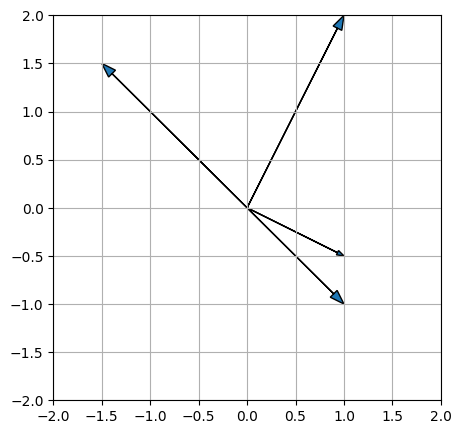

In [7]:
plt.figure(figsize=(5,5))
plt.arrow(0,0,1,2,length_includes_head=True,head_width=0.1,)
plt.arrow(0,0,-1.5,1.5,length_includes_head=True,head_width=0.1)
plt.arrow(0,0,1,-1,length_includes_head=True,head_width=0.1)
plt.arrow(0,0,1,-0.5,length_includes_head=True,head_width=0.05)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.grid()
plt.show()

## Exercício 11: relacionar um vetor à hipotenusa de um triângulo retângulo

Veja a figura abaixo. A seta correspondente ao vetor cobre a [hipotenusa](https://pt.wikipedia.org/wiki/Hipotenusa) de um [triângulo retângulo](https://pt.wikipedia.org/wiki/Tri%C3%A2ngulo_ret%C3%A2ngulo).

1. Qual é o comprimento do [cateto](https://pt.wikipedia.org/wiki/Cateto) azul? 2
2. Qual é o comprimento do [cateto](https://pt.wikipedia.org/wiki/Cateto) vermelho? 1
3. Qual é o comprimento do vetor representado (dica: use o [Teorema de Pitágoras](https://www.mathsisfun.com/geometry/pythagorean-theorem-proof.html))?

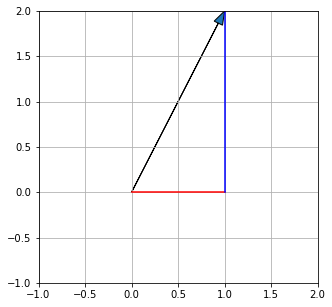

In [7]:
plt.figure(figsize=(5,5))
plt.arrow(0,0,1,2,length_includes_head=True,head_width=0.1)
plt.plot([0,1], [0,0],'r')
plt.plot([1,1], [0,2],'b')
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.grid()
plt.show()

## Exercício 12: calcular o módulo de vetores em duas dimensões

O comprimento da seta que representa um vetor no plano cartesiano é chamado de *módulo* do vetor. Dependendo da referência bibliográfica, o módulo é também chamado de *norma*, ou de *comprimento*. O módulo de um vetor $\boldsymbol {x}$ é representado usando barras verticais. Duas notações comuns são: $|\boldsymbol{x}|$ e $||\boldsymbol{x}||$. Como vimos, de acordo com o [Teorema de Pitágoras](https://www.mathsisfun.com/geometry/pythagorean-theorem-proof.html), o módulo de um vetor de duas dimensões pode ser calculado por:

$$
|\boldsymbol{x}| = \sqrt{x_1^2 + x_2^2}
$$

Calcule (manualmente ou programando! se achar necessário, faça um desenho) os módulos dos vetores:

1. $[3, 4]$ = 5.0
2. $[6, 8]$ = 10.0
3. $[9, 12]$ = 15.0
4. $[-3, 4]$ = 5.0
5. $[-3, -4]$ = 5.0
6. $[3, -4]$ = 5.0

In [6]:
def calc_size(x1, x2):
    return math.sqrt((x1**2) + (x2**2))

calc_size(1,1)

1.4142135623730951

## Exercício 13: calcular módulo de vetores em dimensão alta

Quando um vetor tem mais de duas dimensões (por exemplo, $n$ dimensões), o Teorema de Pitágoras pode ser generalizado para encontrar o módulo:

$$
|\boldsymbol{x}| = \sqrt{x_1^2 + x_2^2 + x_3^2 + ... + x_n^2}
$$

Faça um programa em Python para encontrar o módulo do vetor $\boldsymbol {x}$ definido abaixo (resposta esperada: `7.396`). Seu programa deve funcionar também para calcular o módulo do vetor $\boldsymbol {y}$, que tem tamanho definido aleatoriamente a cada nova execução.

In [5]:
x = np.array([4, -2, 3, 2, 0.5, 0, 1, 2, 1, 3, 2, -1, 0.123, 0.432, 1.1212])
y = np.random.random(np.random.randint(30,70))

def calc_vec_size(vec):
    res = 0

    for n in vec:
        res += n ** 2
    
    return np.sqrt(res)

calc_vec_size(x)

7.396542600431637

# Usar a representação polar de vetores

## Exercício 14: calcular o ângulo entre um vetor e o eixo horizontal

Neste exercício, calcularemos o (menor) ângulo entre o eixo horizontal (eixo x) e a seta que representa o vetor. Esse ângulo representa a direção do vetor e geralmente é referido como $\phi$ (a letra grega *fi*). O ângulo é comumente chamado de *argumento*.

1. Qual é o comprimento do vetor $\boldsymbol{v}$ representado abaixo? 1.4142135623730951
2. Qual dos ângulos do triângulo formado na figura é $\phi$?
3. Qual é o [cosseno](https://pt.wikipedia.org/wiki/Cosseno) de $\phi$?
4. Usando seus conhecimentos de trigonometria, calcule $\phi$ em [radianos](https://pt.wikipedia.org/wiki/Radiano) e em graus. radianos = 0.7853981633974484 | graus = 45.00000000000001
5. Usando a função `np.arccos`, calcule $\phi$ em [radianos](https://pt.wikipedia.org/wiki/Radiano) e em graus.
6. Repita o exercício para $\boldsymbol{v} = [1,2]$

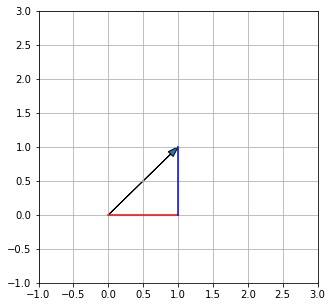

In [11]:
v = np.array([1, 1])
plt.figure(figsize=(5,5))
plt.arrow(0,0,v[0],v[1],length_includes_head=True,head_width=0.1)
plt.plot([0,v[0]], [0,0],'r')
plt.plot([v[0],v[0]], [0,v[1]],'b')
plt.xlim([-1,3])
plt.ylim([-1,3])
plt.grid()
plt.show()

In [41]:
cos_fi = 1 / calc_size(1,1)

(np.arccos(cos_fi))

0.7853981633974484

In [45]:
cos_fi = 1 / calc_size(1,2)

np.degrees(np.arccos(cos_fi))

# rad = 1.1071487177940904
# graus = 63.43494882292201

63.43494882292201

## Exercício 15: calcular o efeito de multiplicações por escalares no módulo e no argumento de vetores

Manipule o vetor $\boldsymbol{v}$ no código abaixo para responder às seguintes questões:
1. Inicialmente, calcule o módulo e o argumento de $\boldsymbol{v}$.
2. Calcule o módulo e o argumento de $2 \boldsymbol{v}$
3. Escolha um número positivo qualquer $a$ e calcule o módulo e o argumento de $a \boldsymbol{v}$
4. Escolha um número negativo qualquer $b$ e calcule o módulo e o argumento de $b \boldsymbol{v}$
5. Escreva: o que acontece com o módulo e o argumento de um vetor quando o vetor é multiplicado por um número qualquer?
o modulo de um vetor é multiplicado e seu argumento permanece o mesmo se for por um numero positivo e se for por um negativo fica diferente.

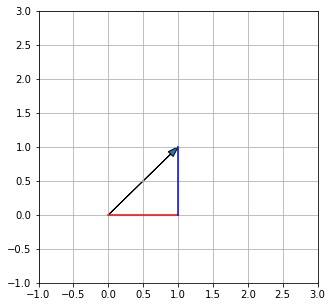

In [10]:
v = np.array([1, 1])
plt.figure(figsize=(5,5))
plt.arrow(0,0,v[0],v[1],length_includes_head=True,head_width=0.1)
plt.plot([0,v[0]], [0,0],'r')
plt.plot([v[0],v[0]], [0,v[1]],'b')
plt.xlim([-1,3])
plt.ylim([-1,3])
plt.grid()
plt.show()


In [51]:
tam = calc_size(1,1)

cos_fi = 1 / tam

np.degrees(np.arccos(cos_fi))

# tamanho = 1.4142135623730951
# argumento = 45.00000000000001

45.00000000000001

In [55]:
tam = calc_size(2,2)

cos_fi = 2 / tam

np.degrees(np.arccos(cos_fi))

# tamanho = 2.8284271247461903
# argumento = 45.00000000000001

2.8284271247461903

In [9]:
def calc_ang(vec):
    tam = calc_size(vec[0], vec[1])

    return np.degrees(np.arccos(vec[0] / tam))

calc_ang(np.array([-1, -1]))

135.0

## Exercício 16: deduzir matematicamente o procedimento para normalizar um vetor

Quando dois vetores têm o mesmo argumento, dizemos que eles têm a mesma direção.

Se temos um vetor $\boldsymbol{v}$ com módulo $|\boldsymbol{v}|$, como podemos encontrar um vetor $\boldsymbol{w}$ com a mesma direção de $\boldsymbol{v}$ e com módulo igual a 1?

para ter um vetor de tamanho 1 com mesma direção e sentido de um outro vetor basta pegar esse vetor e dividir ele todo pelo seu modulo => nesse caso você tera um vetor de tamanho um que segue uma direção de outro vetor e que serve para que caso eu queira escalar esse vetor de modulo 1 que segue uma dir e sentido basta multiplicar por um escalar qualquer => ex: vetor [1, 2] -> normaliza -> [0.3, 0.5] (modulo 1) agora caso eu queira um vetor de modulo 5 na mesma dir de [1, 2] basta mult sua normalização por 5

In [16]:
x = np.array([1, 1])

resultado = 0
for i in range(len(x)):
    resultado += x[i]**2

resultado **= 0.5

norma = x / resultado
calc_size(norma[0] * 2, norma[1] * 2) # 2

1.9999999999999998

## Exercício 17: usar operações vetoriais de `numpy` para calcular o módulo de vetores

As três funções abaixo retornam o módulo de um vetor recebido como entrada.
1. Verifique se essas funções retornam resultados corretos
2. Qual das implementações você acha mais compacta? Por que?

In [12]:
def modulo_A(x):
    mod = 0
    for i in range(len(x)):
        mod += x[i]**2
    mod = mod**0.5
    return mod

def modulo_B(x):
    mod = np.sqrt (np.sum(x**2))
    return mod

def modulo_C(x):
    mod = np.linalg.norm(x)
    return mod

## Exercício 18: aplicar a normalização de vetor em um contexto de jogo digital

O pequeno jogo abaixo foi trabalhado na aula anterior. Nele, um pequeno ponto verde segue o ponteiro do mouse. No comportamento que está implementado, o ponto verde se move mais rápido quando está distante do ponteiro, e mais lento quando se aproxima. 

1. Por que o ponto se move mais rapidamente quando está mais longe do ponteiro do mouse? pois o vetor da distancia entre eles é maior e quando se aproxima fica menor e por isso ele se move mais lentamente quando chega perto
2. Modifique o código de forma que o módulo da velocidade do ponto seja sempre constante e igual a 5.

In [20]:
pygame.init()

# Tamanho da tela e definição do FPS
screen = pygame.display.set_mode((400, 400))
clock = pygame.time.Clock()
FPS = 60  # Frames per Second

BLACK = (0, 0, 0)
COR_PERSONAGEM = (30, 200, 20)

# Inicializar posicoes
s0 = np.array([200,200])
v = np.array([-1, -1])
s = s0

# Personagem
personagem = pygame.Surface((5, 5))  # Tamanho do personagem
personagem.fill(COR_PERSONAGEM)  # Cor do personagem

rodando = True
while rodando:
    # Capturar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            rodando = False

    # Controlar frame rate
    clock.tick(FPS)

    # Processar posicoes
    y = pygame.mouse.get_pos()
    v = y - s

    v = v / np.linalg.norm(v) * 5

    s = s + v

    # Desenhar fundo
    screen.fill(BLACK)

    # Desenhar personagem
    rect = pygame.Rect(s, (10, 10))  # First tuple is position, second is size.
    screen.blit(personagem, rect)

    # Update!
    pygame.display.update()

# Terminar tela
pygame.quit()

KeyboardInterrupt: 

# Implementar sistemas dinâmicos

## Exercício 19: analisar os efeitos da aceleração no movimento uniformemente variado

O código abaixo simula uma situação na qual jogamos uma pequena pedra do alto de um prédio. Na simulação, temos dois fenômenos que acontecem a cada iteração. Primeiro, a velocidade é alterada através da expressão $\boldsymbol {v_n} = \boldsymbol {v_{n-1}} + a$. Depois disso, a posição é alterada pela expressão  $\boldsymbol {s_n} = \boldsymbol {s_{n-1}} + \boldsymbol{v}_{n}$.

1. No código abaixo, qual linha implementa a expressão $\boldsymbol {v_n} = \boldsymbol {v_{n-1}} + a$?
2. No código abaixo, qual linha implementa a expressão $\boldsymbol {s_n} = \boldsymbol {s_{n-1}} + \boldsymbol{v}_{n}$
3. Por que uma das componentes da variável `a` é zero? para não modificar a velocidade no eixo x
4. Modifique o código para que a pedra seja arremessada com uma velocidade inicial com módulo mais alto
5. Modifique o código para que a gravidade seja mais suave que a incialmente projetada
   

In [32]:
pygame.init()

# Tamanho da tela e definição do FPS
screen = pygame.display.set_mode((400, 400))
clock = pygame.time.Clock()
FPS = 60  # Frames per Second

BLACK = (0, 0, 0)
COR_PERSONAGEM = (30, 200, 20)

# Inicializar posicoes
s0 = np.array([50,200])
v0 = np.array([10, -10]) * 2
a = np.array([0, 0.1])
v = v0
s = s0

# Personagem
personagem = pygame.Surface((5, 5))  # Tamanho do personagem
personagem.fill(COR_PERSONAGEM)  # Cor do personagem

rodando = True
while rodando:
    # Capturar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            rodando = False

    if s[0]<10 or s[0]>390 or s[1]<10 or s[1]>390: # Se eu chegar ao limite da tela, reinicio a posição do personagem
        s, v = s0, v0

    # Controlar frame rate
    clock.tick(FPS)

    # Processar posicoes
    v = v + a
    s = s + 0.1 * v

    # Desenhar fundo
    screen.fill(BLACK)

    # Desenhar personagem
    rect = pygame.Rect(s, (10, 10))  # First tuple is position, second is size.
    screen.blit(personagem, rect)

    # Update!
    pygame.display.update()

# Terminar tela
pygame.quit()

KeyboardInterrupt: 

: 

## Exercício 20: adicionar aleatoriedade ao sistema de partículas

Modifique o código do exercício 19 de forma que a velocidade inicial da pedra seja levemente diferente a cada vez que ela é "jogada". Uma das maneiras de conseguir isso é usar um vetor de números aleatórios (`rnd = np.random.randn(2)`) que é multiplicado por algum fator de escala (experimente vários, de acordo com como gostar) e então somado à velocidade da partícula no momento em que ela é re-criada.

## Exercício 21: adicionar interatividade ao sistema de partículas

Modifique novamente o código do exercício 19 de forma que, em adição à modificação feita no exercício 20, as partículas sejam disparadas sempre na direção do ponteiro do mouse do jogador.

## Exercício 22: operar com várias partículas simultaneamente

Modifique novamente o código do exercício 19. Em adição às modificações já feitas, faça com que a simulação agora tenha 50 pedras operando simultaneamente, que são inicializadas do mesmo ponto (fazendo uma espécie de "metralhadora"). Como seria uma boa maneira de representar as posições e velocidades de 50 pedras diferentes?

Após, altere o número máximo de partículas de sua simulação. Até quantas partículas você consegue simular sem ter travamentos na sua máquina?

## Exercício 23: adicionar um atrator gravitacional

Neste momento, estamos pensando na simulação do exercício 19 como jogar pedras de um penhasco. Agora, vamos pensar nela como jogar pequenos meteoritos no espaço sideral. Para isso:

1. Escolha algum ponto da tela em que haverá um corpo celeste maior.
2. Desenhe um círculo ao redor desse ponto, de forma a indicar onde ele se encontra.
3. Remova a gravidade "global" que está sendo aplicada a todas as partículas simultaneamente.
4. A cada iteração, para cada partícula, recalcule a aceleração devida à gravidade. Lembre-se que a aceleração gravitacional é um vetor com módulo $|a| = \frac{c}{d^2}$, onde $c$ é uma constante (na verdade ela tem um significado físico, mas aqui podemos escolher para o valor que deixar sua simulação mais agradável) e $d$ é a distância entre os dois corpos. A aceleração gravitacional aplicada sobre cada partícula sempre aponta para o corpo celeste para onde a partícula está sendo atraída.
5. Lembre-se de adicionar uma condição para que a partícula seja reiniciada caso se aproxime demais do corpo celeste.
6. Modifique os parâmetros e constantes da sua simulação de forma que seja possível deixar algumas partículas em órbita.

## Exercício 24: adicionar um novo atrator gravitacional

Tomando por base o código que você já tem do exercício 23 (que é o código do exercício 19 modificado!), adicione um novo atrator gravitacional, em um outro ponto da tela. Ao fazer isso, passamos a ter dois corpos celestes exercendo atração gravitacional sobre nossas partículas. Quando isso acontece, a aceleração resultante sobre cada partícula é a soma (vetorial) de cada uma das atrações devidas aos corpos celestes individualmente.

Modifique seus parâmetros e interaja com o sistema de forma que algumas partículas fiquem em órbita de um corpo celeste e outras partículas fiquem em órbita do outro corpo celeste.


# Projeto: jogo estilo "Angry Birds no espaço"

Neste projeto, faremos um jogo no estilo "Angry Birds no espaço".

O jogo funciona da seguinte forma:

1. O objetivo é acertar um objeto em um alvo (o grupo pode escolher que tipo de objeto se trata).
2. O jogador usa um canhão para disparar o objeto, e manipula a direção e módulo da velocidade inicial do objeto usando o *mouse*.
3. O objeto, em princípio, navega em movimento uniforme através do espaço.
4. Alguns corpos celestes realizam atração gravitacional, desviando a rota do objeto.
5. Níveis mais avançados têm mais de um corpo celeste. Pense sobre o que acontece quando há duas acelerações gravitacionais atuando sobre o objeto lançado.
6. Use texturas para caracterizar os elementos do jogo!

Anotações importantes:

1. O grupo de projeto deve definir todos os elementos e parâmetros do jogo pensando em melhorar sua jogabilidade.
2. O grupo deve enviar um link para o repositório GitHub onde está localizado o jogo.

**ENTREGAS**
* Link para o repositório onde está o jogo.
* No `README.md` do repositório, inclua uma descrição de como jogar o jogo, como executar o programa, etc.
* No `README.md`, inclua uma breve descrição matemática do modelo físico que você implementou.
* Inclua também, no próprio `README.md`, um GIF com o gameplay do jogo

**RUBRICA**

O projeto será avaliado usando a rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue ou entregue sem completar o `README.md` ou entregue sem adições em relação ao código visto em sala | Não fez |
| E | O jogo foi entregue, mas o `README.md` não indica como instalar ou rodar o programa. | Entender (-) |
| D | O jogo roda com alguns travamentos ou o `README.md` não descreve bem o modelo físico usado ou não tem correpondência com o modelo implementado. | Entender | 
| C | O jogo funciona sem travar e o `README.md` está completo, mas o jogo está muito difícil de jogar devido à falta de ajuste de parâmetros (exemplo: o jogo está muito rápido). | Compreender |
| B | O jogo funciona bem mas o código está muito confuso e sem comentários | Aplicar |
| B+ | jogo obedece a todos os requisitos e o código tem uma correspondência imediata ao modelo físico descrito no `README.md` | Analisar |
| A | Jogo funciona perfeitamente e, em adição aos requisitos pedidos, tem ao menos uma feature que altera o modelo físico inicialmente proposto (novas formas de interagir com o jogador, ou novos elementos com comportamentos diferentes, por exemplo) | Avaliar |
| A+ | O jogo tem features estéticas em adição às texturas (efeitos sonoros, trilha sonora, possibilidade de customizar parâmetros de dentro do próprio jogo, etc.) | Criar |
